In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")
df3 = pd.read_csv("data3.csv")
df4 = pd.read_csv("data4.csv")
df5 = pd.read_csv("data5.csv")
df6 = pd.read_csv("data6.csv")
df7 = pd.read_csv("data7.csv")
df8 = pd.read_csv("data8.csv")
df9 = pd.read_csv("data9.csv")
df10 = pd.read_csv("data10.csv")
df11 = pd.read_csv("data11.csv")
df12 = pd.read_csv("data12.csv")

In [3]:
df = df1.append([df2,df3,df4,df5,df6,df7,df8,df9])
df['Age Bracket'].replace({'28-35':'31.5','5 Months':'5','6 Months':'6','5 months':'5', '9 Months':'9', '8 month':'8', 
       '1 DAY':'0', '9 Month':'9', '18-28':'23', '16':'0.5',np.nan:0,'16 DAYS':0.5},inplace=True)

df = df[df['Age Bracket']!=0]

In [4]:
df.set_index("Patient Number")

,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,...,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases,Entry_ID
Patient Number,,,,,,,,,,,,,,,,,,,,,
1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,...,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN
4.0,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,...,NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1.0,NaN
5.0,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,...,NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1.0,NaN
6.0,NaN,03/03/2020,NaN,69,M,Jaipur,Italians,Rajasthan,RJ,Recovered,...,NaN,Italy,Imported,03/03/2020,https://indianexpress.com/article/india/corona...,https://economictimes.indiatimes.com/news/poli...,https://twitter.com/PTI_News/status/1240878975...,Italian tourist,1.0,NaN
7.0,NaN,04/03/2020,NaN,55,NaN,Gurugram,Italians,Haryana,HR,Recovered,...,P6,Italy,Imported,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,13/07/2020,NaN,60,M,Vasco,South Goa,Goa,GA,Deceased,...,NaN,NaN,NaN,NaN,https://twitter.com/DHS_Goa/status/12827087390...,NaN,NaN,NaN,1.0,144312.0
NaN,NaN,13/07/2020,NaN,58,M,Chicalim,South Goa,Goa,GA,Deceased,...,NaN,NaN,NaN,NaN,https://twitter.com/DHS_Goa/status/12827087390...,NaN,NaN,NaN,1.0,144313.0
NaN,NaN,13/07/2020,NaN,12,M,NaN,Aizawl,Mizoram,MZ,Hospitalized,...,NaN,NaN,NaN,NaN,https://twitter.com/dipr_mizoram/status/128272...,NaN,NaN,NaN,1.0,144388.0


In [5]:
df.isnull().sum().sort_values(ascending = False)

Estimated Onset Date                         75317
Source_3                                     75167
Backup Notes                                 75115
Nationality                                  74461
Contracted from which Patient (Suspected)    74337
Source_2                                     74239
Type of transmission                         74166
Status Change Date                           72973
Detected City                                65712
Patient Number                               37527
Notes                                        31212
State Patient Number                         25330
Entry_ID                                      2346
Source_1                                      1250
Gender                                         723
Detected District                               36
Detected State                                   0
State code                                       0
Age Bracket                                      0
Num Cases                      

In [6]:
Cur = df.groupby('Detected State')['Current Status'].value_counts().loc['Delhi']
Cur


Current Status
Hospitalized    11
Deceased         3
Recovered        1
Name: Current Status, dtype: int64

Text(0.5, 1.0, 'Current status')

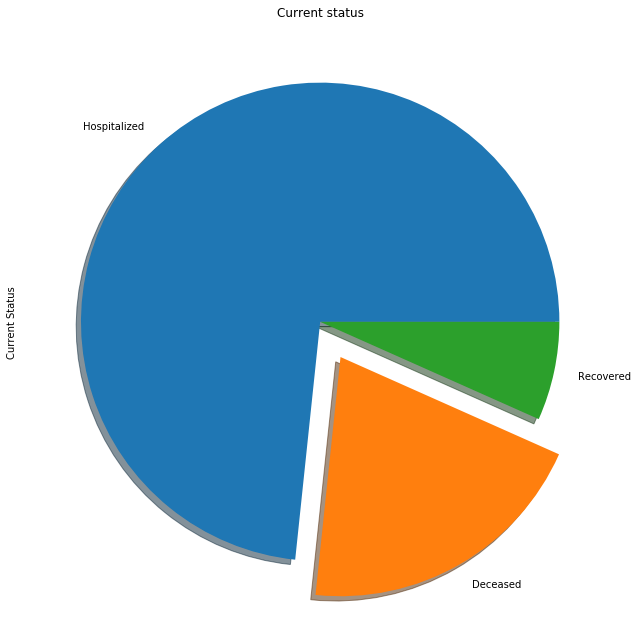

In [7]:
Cur.plot.pie(figsize = (11,11),shadow=True,explode=[0,0.17,0])
plt.title("Current status", loc = 'center')

In [8]:
df.groupby('Detected State')['Type of transmission'].value_counts()

Detected State               Type of transmission
Andaman and Nicobar Islands  Local                    3
Andhra Pradesh               Local                   74
                             Imported                10
Bihar                        Local                   14
                             Imported                12
                                                     ..
Uttarakhand                  Imported                 2
                             TBD                      2
West Bengal                  Local                   15
                             Imported                 6
                             TBD                      5
Name: Type of transmission, Length: 66, dtype: int64

In [54]:
df['Type of transmission']

74166

In [58]:
 tran = df['Type of transmission'].value_counts(), labels = ['Local','TBD',"Imported","",""])

SyntaxError: invalid syntax (<ipython-input-58-3b414623f7e3>, line 1)

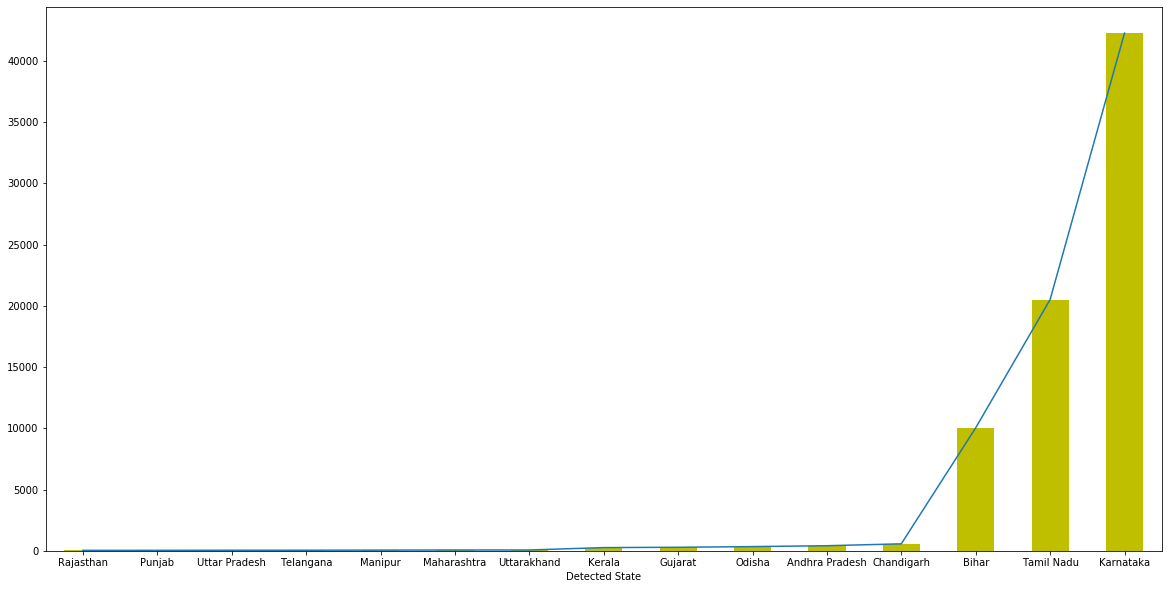

In [59]:
df1 = df.groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False).head(15).sort_values()
df1.plot.bar(figsize = (20,10),color = 'y')
df1.plot.line()
plt.show()

In [12]:
a = df.groupby('Gender')['Num Cases'].sum()
a

Gender
F             25115.0
M             49429.0
M                 1.0
Non-Binary       13.0
Name: Num Cases, dtype: float64

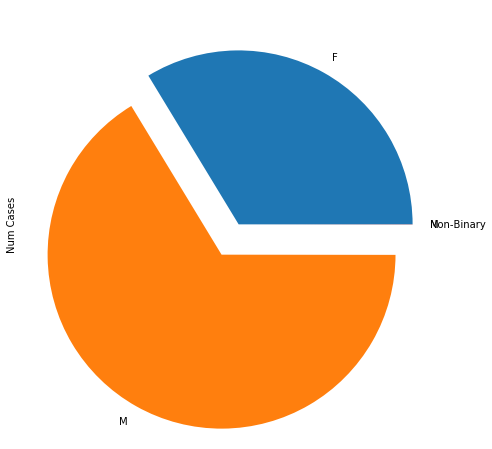

In [13]:
a = df.groupby('Gender')['Num Cases'].sum()
a.plot.pie(figsize=(8,8),explode = [0,0.2,0,0])

In [14]:
df.isnull().sum().sort_values(ascending = False)/len(df)*100 #counting percentage of null value in each column

Estimated Onset Date                         100.000000
Source_3                                      99.800842
Backup Notes                                  99.731800
Nationality                                   98.863470
Contracted from which Patient (Suspected)     98.698833
Source_2                                      98.568716
Type of transmission                          98.471793
Status Change Date                            96.887821
Detected City                                 87.247235
Patient Number                                49.825405
Notes                                         41.440843
State Patient Number                          33.631186
Entry_ID                                       3.114835
Source_1                                       1.659652
Gender                                         0.959943
Detected District                              0.047798
Detected State                                 0.000000
State code                                     0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75317 entries, 0 to 26839
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient Number                             37790 non-null  float64
 1   State Patient Number                       49987 non-null  object 
 2   Date Announced                             75317 non-null  object 
 3   Estimated Onset Date                       0 non-null      float64
 4   Age Bracket                                75317 non-null  object 
 5   Gender                                     74594 non-null  object 
 6   Detected City                              9605 non-null   object 
 7   Detected District                          75281 non-null  object 
 8   Detected State                             75317 non-null  object 
 9   State code                                 75317 non-null  object 
 10  Current Status        

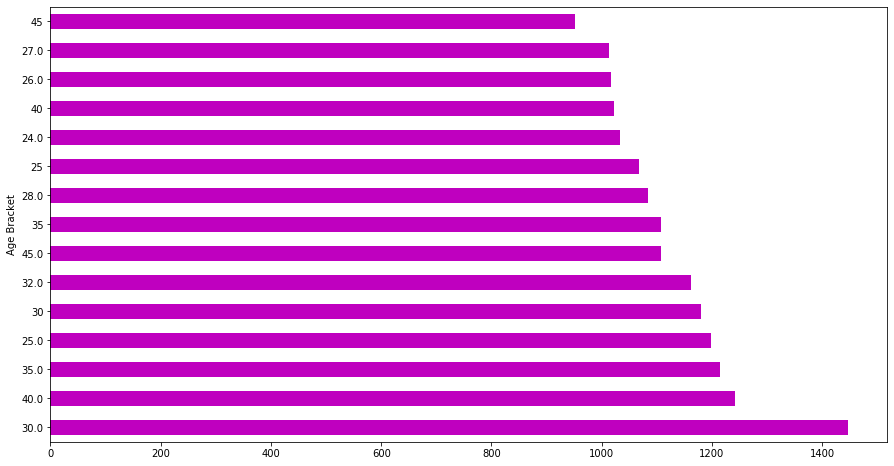

In [16]:
age = df.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending =False).nlargest(15)
age.plot.barh(figsize= (15,8),color = 'm')

In [17]:
#Agenda x- axis : Months, # stack of recoveries, death and hospitalisation, No of cases Age Bracket, Num Cases, 
#Current Status Deceased .nlargest(15).sort_values(ascending= False)

In [18]:
Age = df[df['Age Bracket'].notnull()]
New_Age =(Age['Age Bracket'].unique().astype('str'))


In [19]:
Rec = df[df['Current Status']=='Recovered'].groupby(['Age Bracket'])['Current Status'].value_counts().nlargest(10)
Rec
Age_Rec = df[df['Current Status']=='Recovered']['Age Bracket']

In [20]:
Hos = df[df['Current Status']=='Hospitalized'].groupby(['Age Bracket'])['Current Status'].value_counts()

Age_Hos = df[df['Current Status']=='Hospitalized']['Age Bracket']

In [21]:
Dec = df[df['Current Status']=='Deceased'].groupby(['Age Bracket'])['Current Status'].value_counts()
                                                                                                            
Age_Dec = df[df['Current Status']=='Deceased']['Age Bracket']
Age_Dec

72       69
76       65
81       76
181      70
269      63
         ..
26601    56
26651    47
26652    60
26653    58
26839    32
Name: Age Bracket, Length: 1367, dtype: object

In [22]:
Age_Rec = Age_Rec.append([Age_Hos,Age_Dec]).unique()


In [25]:
df.shape

(75317, 22)

In [26]:
df.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes', 'Num Cases', 'Entry_ID'],
      dtype='object')

In [27]:
df_n =df['Date Announced'].str.split('/', expand =True)

In [28]:
df_n.columns= ['Date','Month','Year']

In [29]:
df_n.isnull().sum()

Date     0
Month    0
Year     0
dtype: int64

In [30]:
df = pd.concat([df,df_n],axis=1)


In [31]:
df['Date'].isnull().sum()

0

In [32]:
df_n

,Date,Month,Year
0,30,01,2020
3,02,03,2020
4,02,03,2020
5,03,03,2020
6,04,03,2020
...,...,...,...
26652,13,07,2020
26653,13,07,2020
26727,13,07,2020
26728,13,07,2020


In [56]:
filt = df['Date']!= np.nan

In [37]:
month_cases = df.groupby(['Month','Date'])['Num Cases'].sum()

In [38]:
month_cases

Month  Date
01     30         1.0
03     02         2.0
       03         1.0
       04        17.0
       05         2.0
                ...  
07     09      2270.0
       10      2402.0
       11      2898.0
       12      2724.0
       13      2867.0
Name: Num Cases, Length: 134, dtype: float64

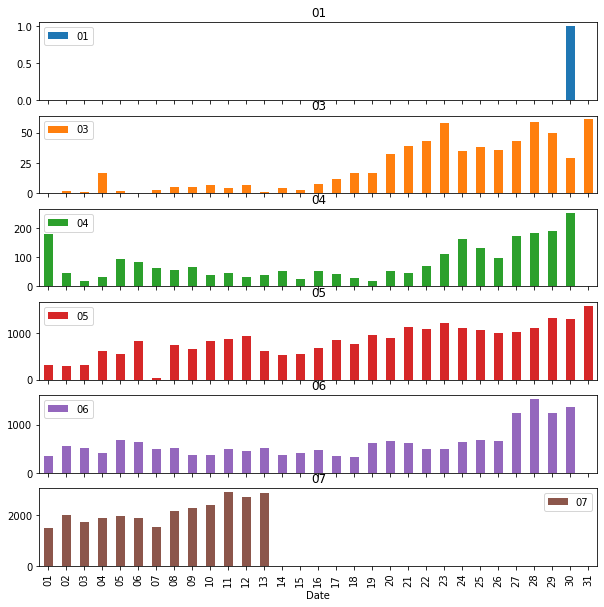

In [52]:
lab =(['Jan','Mar','April','may','June','July'])
month_cases.unstack(level=0).plot(kind='bar',subplots =True,figsize=(10,10), label = lab)
plt.legend()
plt.show()

In [57]:
df

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases,Entry_ID,Date,Month,Year
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,...,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN,30,01,2020
3,4.0,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1.0,NaN,02,03,2020
4,5.0,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,...,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1.0,NaN,02,03,2020
5,6.0,NaN,03/03/2020,NaN,69,M,Jaipur,Italians,Rajasthan,RJ,...,03/03/2020,https://indianexpress.com/article/india/corona...,https://economictimes.indiatimes.com/news/poli...,https://twitter.com/PTI_News/status/1240878975...,Italian tourist,1.0,NaN,03,03,2020
6,7.0,NaN,04/03/2020,NaN,55,NaN,Gurugram,Italians,Haryana,HR,...,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist,1.0,NaN,04,03,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26652,NaN,NaN,13/07/2020,NaN,60,M,Vasco,South Goa,Goa,GA,...,NaN,https://twitter.com/DHS_Goa/status/12827087390...,NaN,NaN,NaN,1.0,144312.0,13,07,2020
26653,NaN,NaN,13/07/2020,NaN,58,M,Chicalim,South Goa,Goa,GA,...,NaN,https://twitter.com/DHS_Goa/status/12827087390...,NaN,NaN,NaN,1.0,144313.0,13,07,2020
26727,NaN,NaN,13/07/2020,NaN,12,M,NaN,Aizawl,Mizoram,MZ,...,NaN,https://twitter.com/dipr_mizoram/status/128272...,NaN,NaN,NaN,1.0,144388.0,13,07,2020
26728,NaN,NaN,13/07/2020,NaN,29,M,NaN,Aizawl,Mizoram,MZ,...,NaN,https://twitter.com/dipr_mizoram/status/128272...,NaN,NaN,NaN,1.0,144389.0,13,07,2020


In [91]:
bins =[0,10,20,30,40,50,60,70,80,90,100,110,120]
age = df['Age Bracket'].astype(float)
med = df['Age Bracket'].median()

(array([3.4360e+03, 5.8250e+03, 1.7365e+04, 1.7121e+04, 1.3272e+04,
        9.8530e+03, 5.5740e+03, 2.1680e+03, 6.2200e+02, 8.0000e+01,
        1.0000e+00, 0.0000e+00]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120]),
 <a list of 12 Patch objects>)

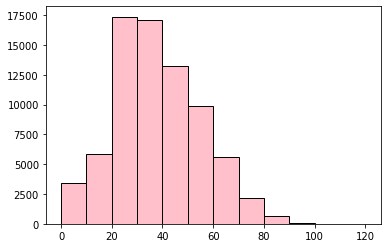

In [108]:
plt.hist(age, bins = bins, edgecolor = 'black',color ='pink',  log = False)